In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from matplotlib.pyplot import style
from sklearn.manifold import TSNE


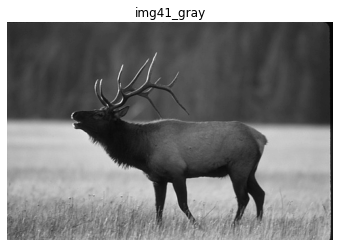

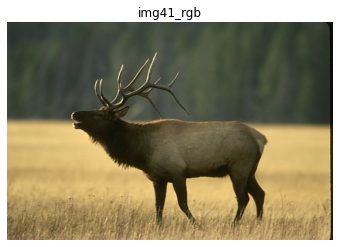

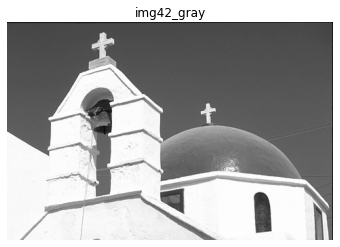

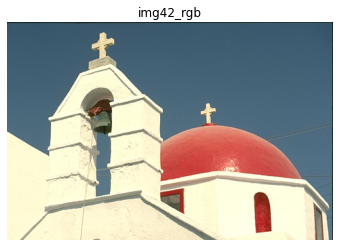

In [2]:
# Question4
# read images: imgQ41.jpg and imgQ42.jpg
img41 = cv2.imread("imgQ41.jpg")
img41_rgb = cv2.cvtColor(img41, cv2.COLOR_BGR2RGB)
img41_gray = cv2.cvtColor(img41_rgb, cv2.COLOR_RGB2GRAY)

img42 = cv2.imread("imgQ42.jpg")
img42_rgb = cv2.cvtColor(img42, cv2.COLOR_BGR2RGB)
img42_gray = cv2.cvtColor(img42_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(img41_gray, 'gray'),plt.axis("off"),plt.title("img41_gray")
plt.show()
plt.imshow(img41_rgb),plt.axis("off"),plt.title("img41_rgb")
plt.show()
plt.imshow(img42_gray, 'gray'),plt.axis("off"),plt.title("img42_gray")
plt.show()
plt.imshow(img42_rgb),plt.axis("off"),plt.title("img42_rgb")
plt.show()


# plt.subplot(2,2,1), plt.imshow(img41_gray, 'gray')
# plt.title("img41_gray"),plt.axis("off")

# plt.subplot(2,2,2),plt.imshow(img41_rgb)
# plt.title("img41_rgb"),plt.axis("off")

# plt.subplot(2,2,3),plt.imshow(img42_gray, 'gray')
# plt.title("img42_gray"),plt.axis("off")

# plt.subplot(2,2,4),plt.imshow(img42_rgb)
# plt.title("img42_rgb"),plt.axis("off")

# plt.show()


In [3]:
def _watershed(img, gray, threshold):
    
    # 
    img = img 
    # Otsu-threshold, Binary processing of grayscale images
#     if threshold is not None:
    ret, img_thresh =cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
#     ret, img_thresh =cv2.threshold(gray,  0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # noise removal 
    kernel =np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN,kernel, iterations=2)
    # sure background area (dilate 膨胀操作)
    sure_bg = cv2.dilate(opening, kernel,iterations =7)
    
    # find sure foregroud area, 
    dist_transform =cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.001*dist_transform.max(), 255, 0 )
    
    # Find unkown region
    sure_fg =np.uint8(sure_fg)
    unkown = cv2.subtract(sure_bg, sure_fg )
    
    # mark labelling
    ret, markers1 =cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1 
    markers = markers1+1

    #  mark  the region of unkown with zero
    markers[unkown==255] =0
    
    markers3 = watershed(-dist_transform, markers, mask=img_thresh)
    
    #markers3 =cv2.watershed(img, markers)
    img[markers==-1] = [255,0,0]

    return markers3
    

In [4]:
def mean_shift (img):
    
    # split three (r,g,b) channels
    red, green, blue = cv2.split(img)
    r_data = red.flatten()
    g_data = green.flatten()
    b_data = blue.flatten()
    # for later to reshape pixel-matrix 
    o = blue.shape
    data = np.column_stack([r_data,g_data,b_data])
    
    #  meanshift 
    clf = MeanShift(bandwidth= 20, bin_seeding =True)
    predicted = clf.fit_predict(data).reshape(o)
    
    return predicted

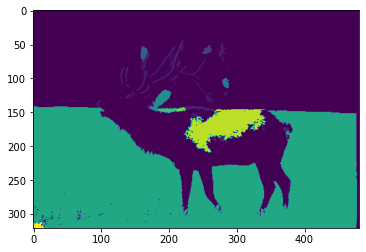

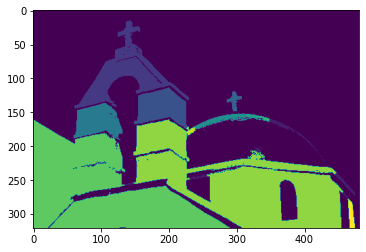

In [5]:
watershed_41 = _watershed(img41, img41_gray, 90)
watershed_42 = _watershed(img42, img42_gray, 160)
plt.imshow(watershed_41)
plt.show()
plt.imshow(watershed_42)
plt.show()

In [6]:
meanshift_41 = mean_shift(img41_rgb)
meanshift_42 = mean_shift(img42_rgb)

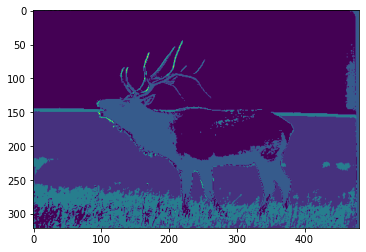

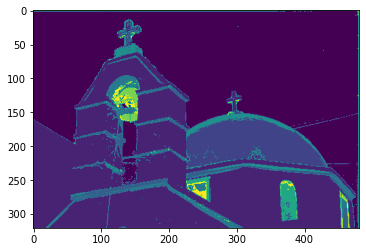

In [7]:
plt.imshow(meanshift_41)
plt.show()
plt.imshow(meanshift_42)
plt.show()


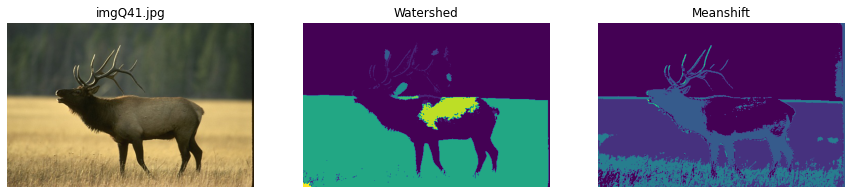

In [8]:
#output imageQ41
plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(img41_rgb)
plt.title("imgQ41.jpg"),plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(watershed_41)
plt.title("Watershed"),plt.axis("off")


plt.subplot(1,3,3)
plt.imshow(meanshift_41)
plt.title("Meanshift"),plt.axis("off")

plt.show()


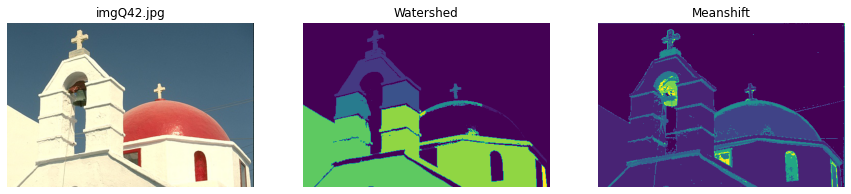

In [9]:
#output imageQ42

plt.figure(figsize=(15,20))

plt.subplot(1,3,1),plt.imshow(img42_rgb)
plt.title("imgQ42.jpg"),plt.axis("off")

plt.subplot(1,3,2),plt.imshow(watershed_42)
plt.title("Watershed"),plt.axis("off")


plt.subplot(1,3,3),plt.imshow(meanshift_42)
plt.title("Meanshift"),plt.axis("off")


plt.show()
